# Linear Regression

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [288]:
# Load data
df = pd.read_excel('data/Monthly Mastersheet.xlsx')

# Ensure date is datetime and set index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

## CPI
updated June 11
Tether (0.536), Ethereum 0.291

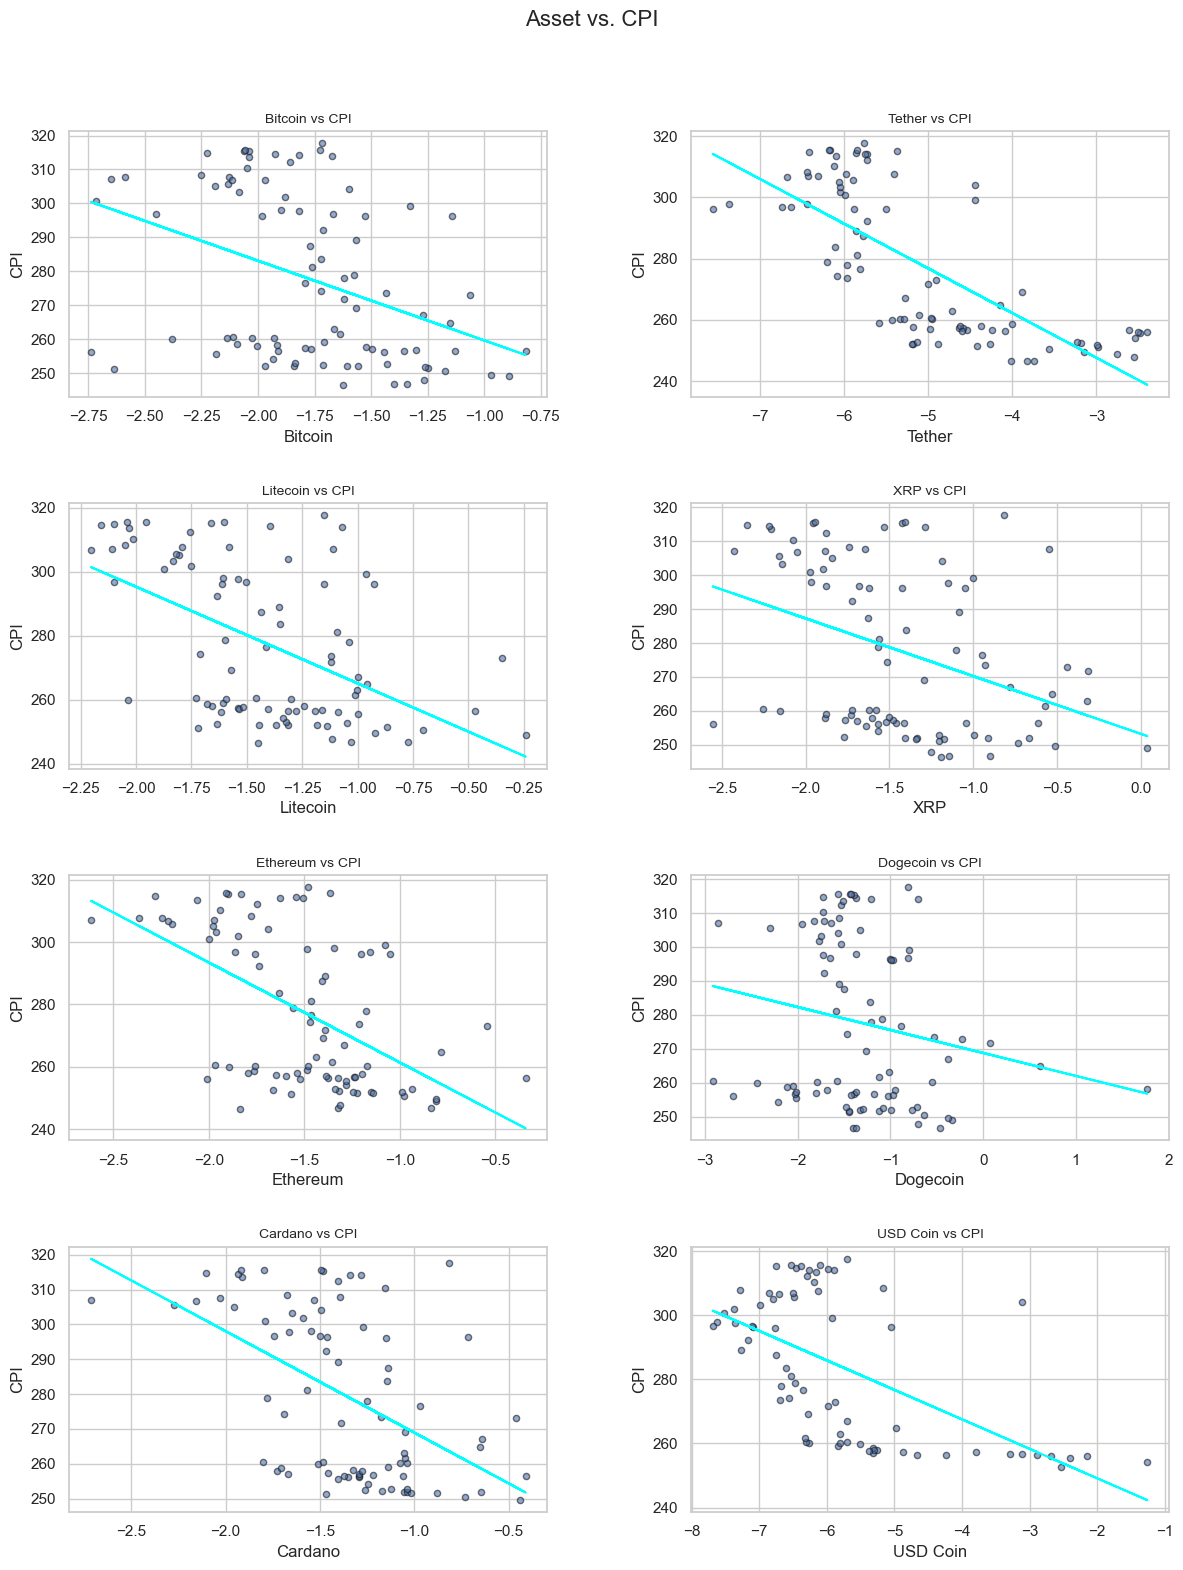

===== Bitcoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     15.71
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           0.000152
Time:                        15:11:02   Log-Likelihood:                -397.93
No. Observations:                  88   AIC:                             799.9
Df Residuals:                      86   BIC:                             804.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const  

In [301]:
asset_cols = ['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']
macro_cols = ['CPI']

sns.set(style="whitegrid")

total_plots = len(asset_cols) * len(macro_cols)
plots_per_row = 2
n_rows = (total_plots + plots_per_row - 1) // plots_per_row  # ceiling division

fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(6 * plots_per_row, 4 * n_rows))
fig.suptitle("Asset vs. CPI", fontsize=16)

axes = axes.flatten() if total_plots > 1 else [axes]
model_results = []

plot_idx = 0
for asset in asset_cols:
    for macro in macro_cols:
        if plot_idx >= total_plots:
            break
        ax = axes[plot_idx]

        df['Lagged_LogVol'] = df[asset].shift(1)
        # Drop first row due to NaN from lag
        temp_df = df.dropna(subset=['Lagged_LogVol', macro])

        X = temp_df['Lagged_LogVol']
        y = temp_df[macro]

        X = sm.add_constant(X)  # Adds intercept

        # Scatter plot
        ax.scatter(temp_df['Lagged_LogVol'], y, alpha=0.6, edgecolor='k', s=20, label='Data Points')

        # Fit OLS model
        model = sm.OLS(y, X).fit()
        model_results.append((asset.strip(), model))

        # Plot regression line
        ax.plot(temp_df['Lagged_LogVol'], model.predict(X), color='cyan', label='Regression Line')

        ax.set_xlabel(asset.strip())
        ax.set_ylabel(macro)
        ax.set_title(f"{asset.strip()} vs {macro}", fontsize=10)

        plot_idx += 1
        

# Hide unused subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

for asset_name, model in model_results:
    print(f"===== {asset_name} Regression Summary =====")
    print(model.summary())
    print("\n")


## Imports (IM)
#### Tether (0.417), USD coin (0.284)

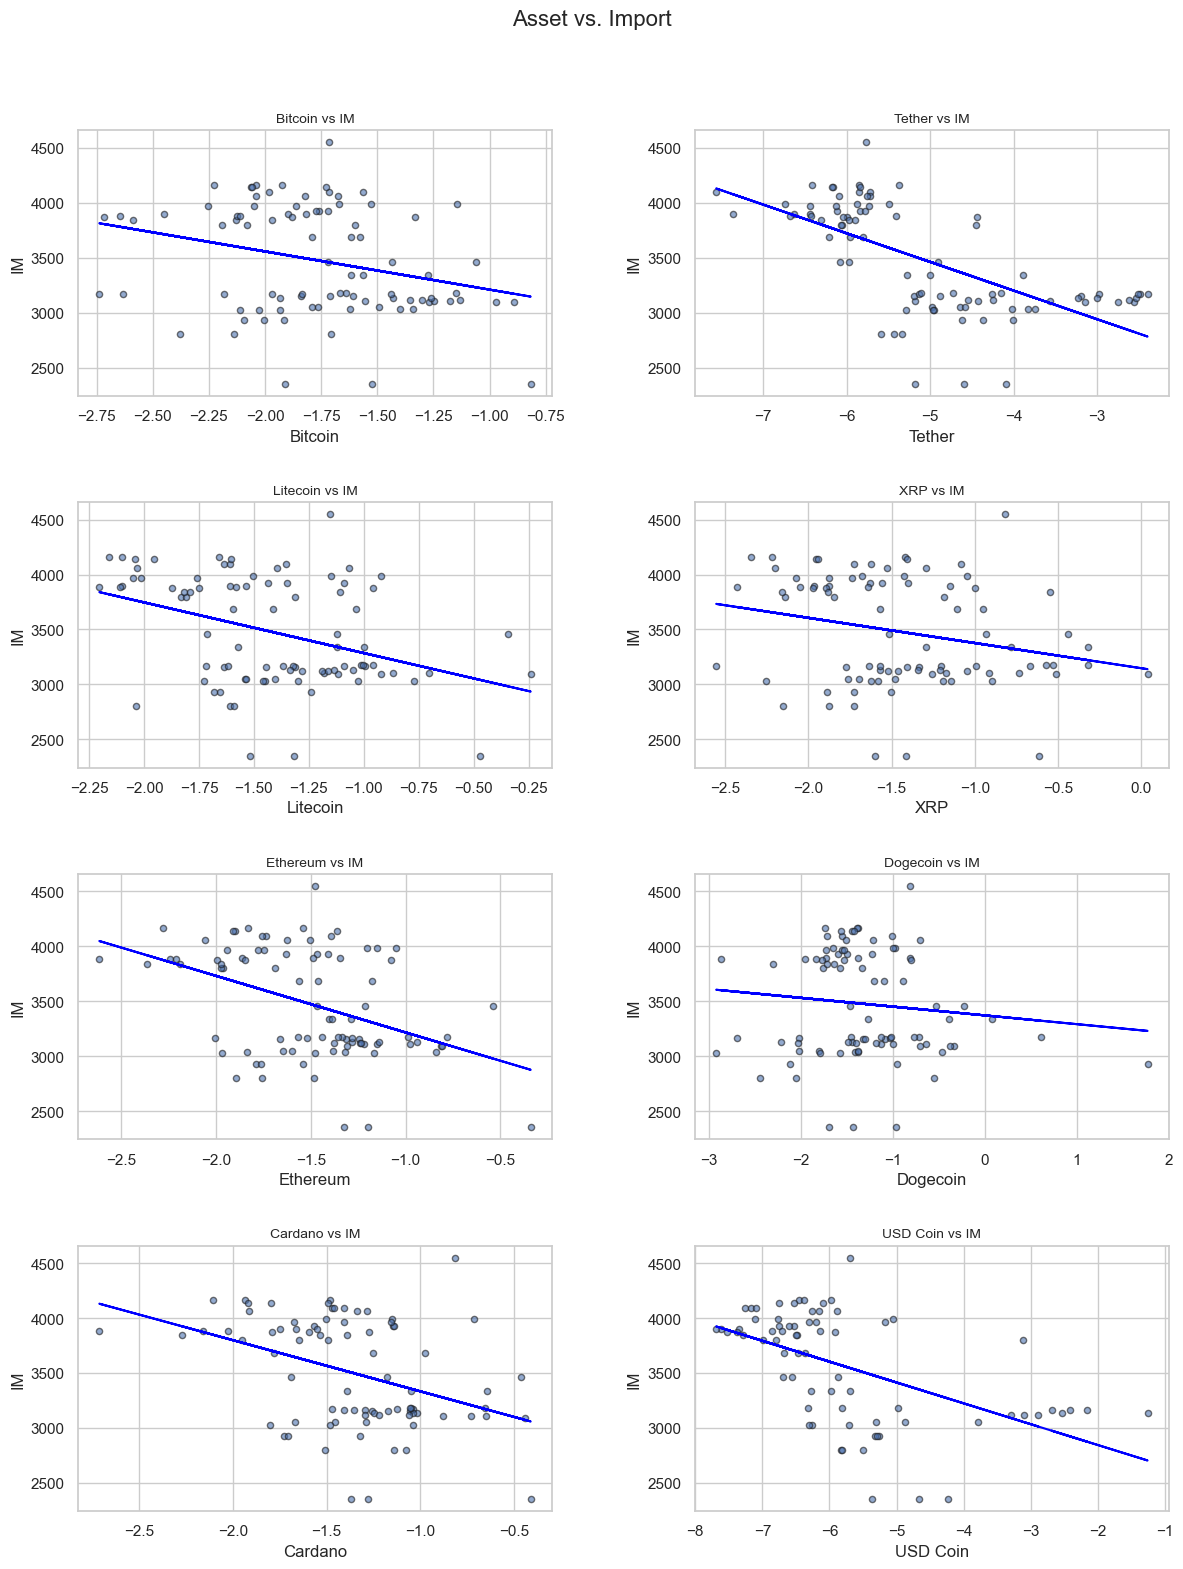

===== Bitcoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     IM   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     7.752
Date:                Wed, 11 Jun 2025   Prob (F-statistic):            0.00660
Time:                        15:17:13   Log-Likelihood:                -666.17
No. Observations:                  88   AIC:                             1336.
Df Residuals:                      86   BIC:                             1341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const  

In [304]:
asset_cols = ['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']
macro_cols = ['IM']

sns.set(style="whitegrid")

total_plots = len(asset_cols) * len(macro_cols)
plots_per_row = 2
n_rows = (total_plots + plots_per_row - 1) // plots_per_row  # ceiling division

fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(6 * plots_per_row, 4 * n_rows))
fig.suptitle("Asset vs. Import", fontsize=16)

axes = axes.flatten() if total_plots > 1 else [axes]
model_results = []

plot_idx = 0
for asset in asset_cols:
    for macro in macro_cols:
        if plot_idx >= total_plots:
            break
        ax = axes[plot_idx]

        df['Lagged_LogVol'] = df[asset].shift(1)
        # Drop first row due to NaN from lag
        temp_df = df.dropna(subset=['Lagged_LogVol', macro])

        X = temp_df['Lagged_LogVol']
        y = temp_df[macro]

        X = sm.add_constant(X)  # Adds intercept

        # Scatter plot
        ax.scatter(temp_df['Lagged_LogVol'], y, alpha=0.6, edgecolor='k', s=20, label='Data Points')

        # Fit OLS model
        model = sm.OLS(y, X).fit()
        model_results.append((asset.strip(), model))

        # Plot regression line
        ax.plot(temp_df['Lagged_LogVol'], model.predict(X), color='blue', label='Regression Line')

        ax.set_xlabel(asset.strip())
        ax.set_ylabel(macro)
        ax.set_title(f"{asset.strip()} vs {macro}", fontsize=10)

        plot_idx += 1
        

# Hide unused subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

for asset_name, model in model_results:
    print(f"===== {asset_name} Regression Summary =====")
    print(model.summary())
    print("\n")

## Exports (EX)

apparent outliers (Covid), Tether 0.312, Ethereum 0.213, cardano 0.198, USD coin 0.194

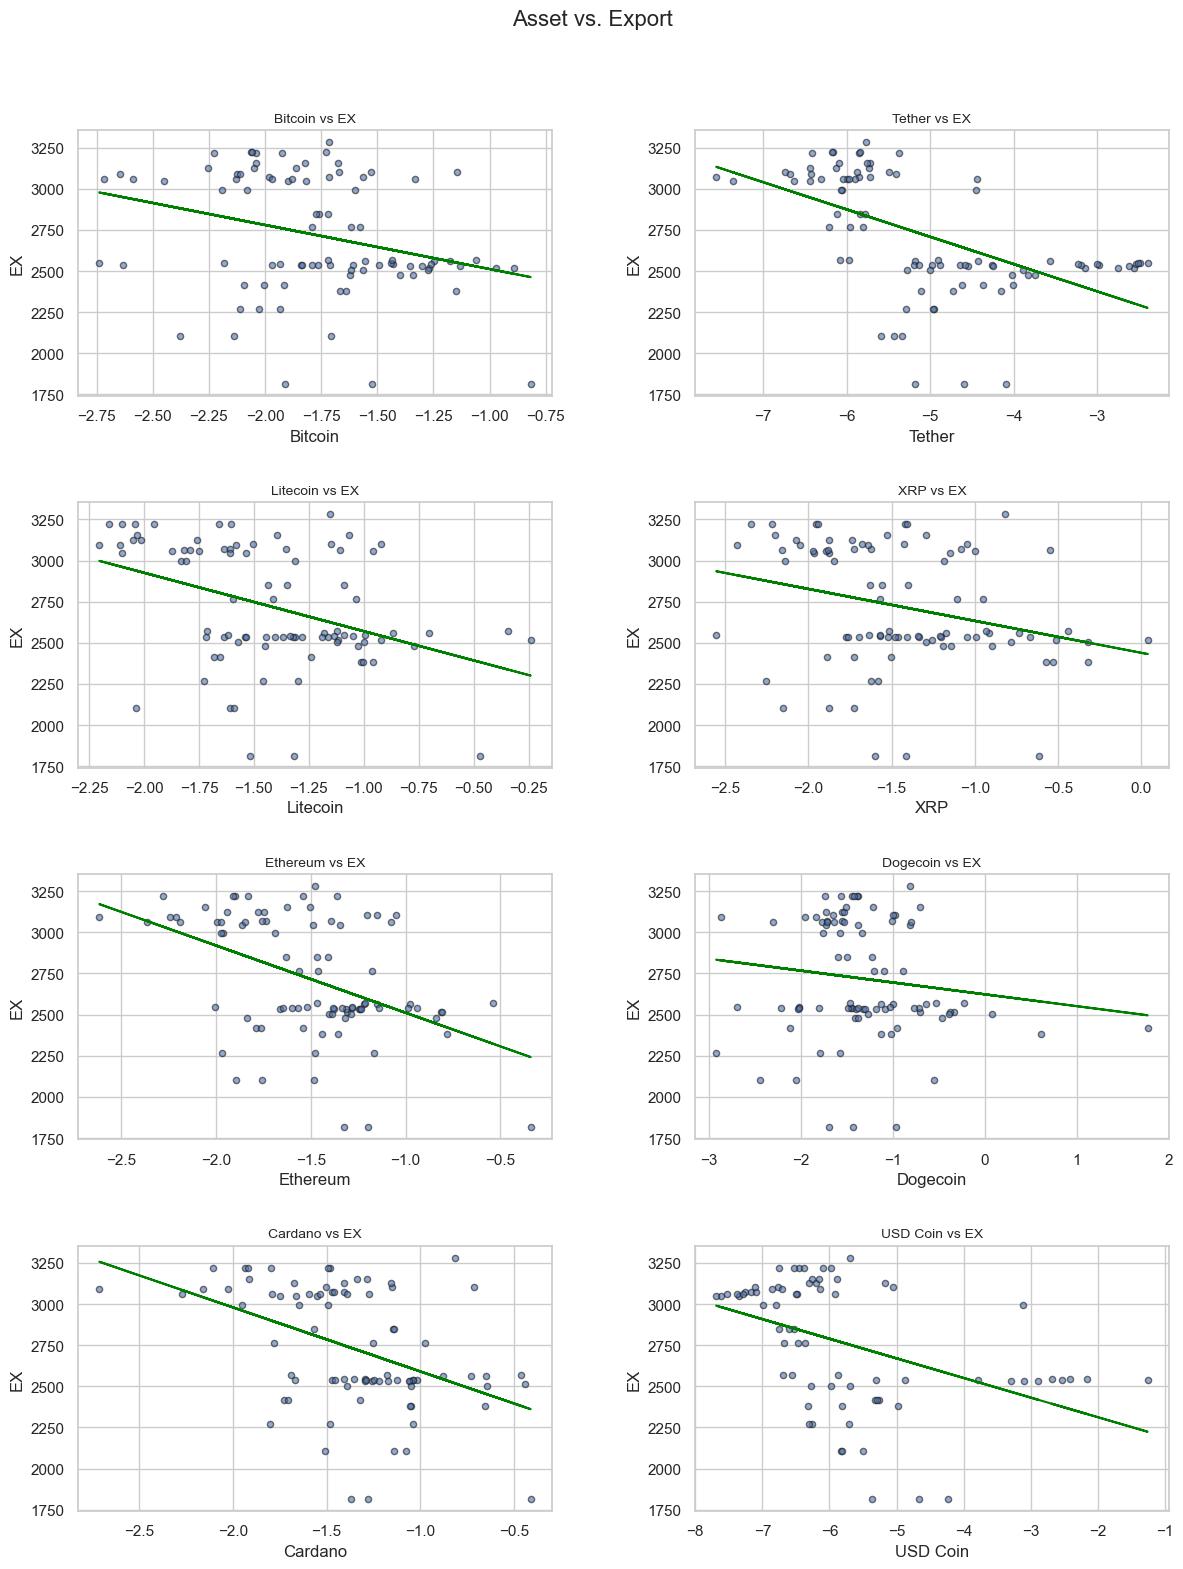

===== Bitcoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     EX   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     8.590
Date:                Wed, 11 Jun 2025   Prob (F-statistic):            0.00433
Time:                        15:19:23   Log-Likelihood:                -638.65
No. Observations:                  88   AIC:                             1281.
Df Residuals:                      86   BIC:                             1286.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const  

In [306]:
asset_cols = ['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']
macro_cols = ['EX']

sns.set(style="whitegrid")

total_plots = len(asset_cols) * len(macro_cols)
plots_per_row = 2
n_rows = (total_plots + plots_per_row - 1) // plots_per_row  # ceiling division

fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(6 * plots_per_row, 4 * n_rows))
fig.suptitle("Asset vs. Export", fontsize=16)

axes = axes.flatten() if total_plots > 1 else [axes]
model_results = []

plot_idx = 0
for asset in asset_cols:
    for macro in macro_cols:
        if plot_idx >= total_plots:
            break
        ax = axes[plot_idx]

        df['Lagged_LogVol'] = df[asset].shift(1)
        # Drop first row due to NaN from lag
        temp_df = df.dropna(subset=['Lagged_LogVol', macro])

        X = temp_df['Lagged_LogVol']
        y = temp_df[macro]

        X = sm.add_constant(X)  # Adds intercept

        # Scatter plot
        ax.scatter(temp_df['Lagged_LogVol'], y, alpha=0.6, edgecolor='k', s=20, label='Data Points')

        # Fit OLS model
        model = sm.OLS(y, X).fit()
        model_results.append((asset.strip(), model))

        # Plot regression line
        ax.plot(temp_df['Lagged_LogVol'], model.predict(X), color='green', label='Regression Line')

        ax.set_xlabel(asset.strip())
        ax.set_ylabel(macro)
        ax.set_title(f"{asset.strip()} vs {macro}", fontsize=10)

        plot_idx += 1
        

# Hide unused subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

for asset_name, model in model_results:
    print(f"===== {asset_name} Regression Summary =====")
    print(model.summary())
    print("\n")

## Consumer Confidence (CC)
#### Tether (0.618), USD Coin (0.502)

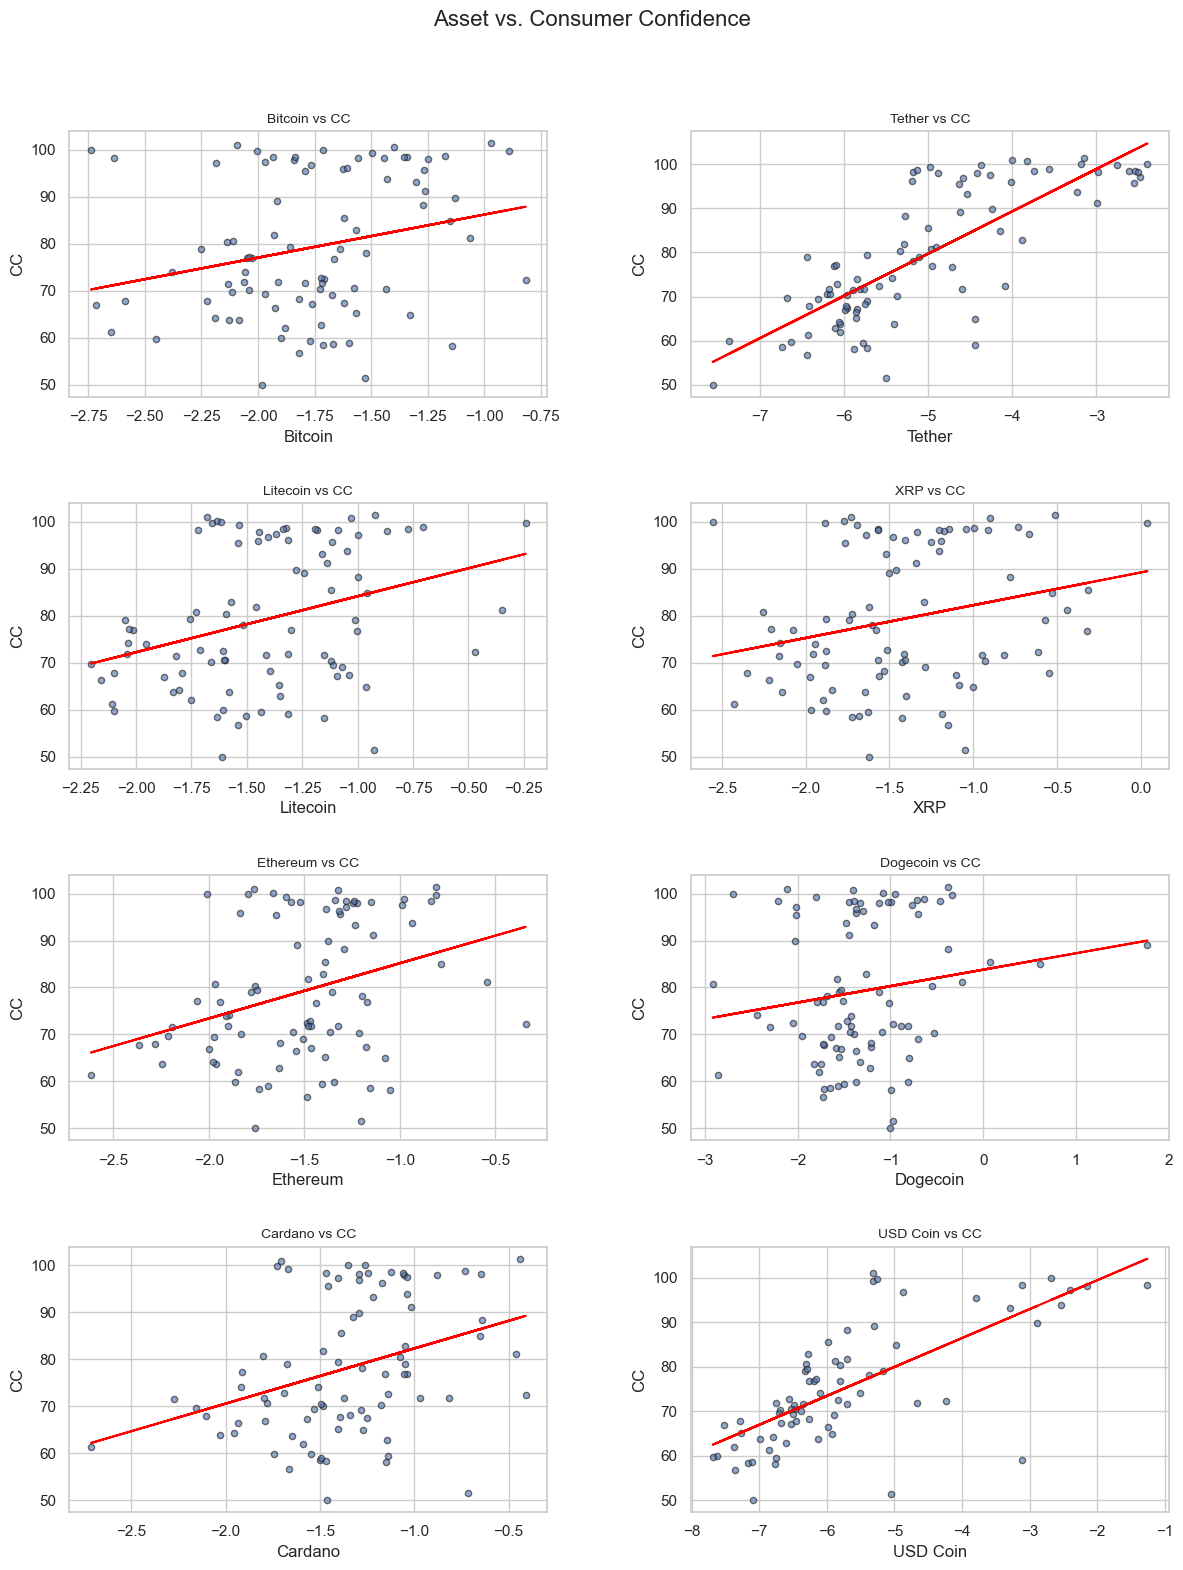

===== Bitcoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                     CC   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     5.803
Date:                Wed, 11 Jun 2025   Prob (F-statistic):             0.0181
Time:                        15:20:06   Log-Likelihood:                -359.08
No. Observations:                  88   AIC:                             722.2
Df Residuals:                      86   BIC:                             727.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const  

In [307]:
asset_cols = ['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']
macro_cols = ['CC']

sns.set(style="whitegrid")

total_plots = len(asset_cols) * len(macro_cols)
plots_per_row = 2
n_rows = (total_plots + plots_per_row - 1) // plots_per_row  # ceiling division

fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(6 * plots_per_row, 4 * n_rows))
fig.suptitle("Asset vs. Consumer Confidence", fontsize=16)

axes = axes.flatten() if total_plots > 1 else [axes]
model_results = []

plot_idx = 0
for asset in asset_cols:
    for macro in macro_cols:
        if plot_idx >= total_plots:
            break
        ax = axes[plot_idx]

        df['Lagged_LogVol'] = df[asset].shift(1)
        # Drop first row due to NaN from lag
        temp_df = df.dropna(subset=['Lagged_LogVol', macro])

        X = temp_df['Lagged_LogVol']
        y = temp_df[macro]

        X = sm.add_constant(X)  # Adds intercept

        # Scatter plot
        ax.scatter(temp_df['Lagged_LogVol'], y, alpha=0.6, edgecolor='k', s=20, label='Data Points')

        # Fit OLS model
        model = sm.OLS(y, X).fit()
        model_results.append((asset.strip(), model))

        # Plot regression line
        ax.plot(temp_df['Lagged_LogVol'], model.predict(X), color='red', label='Regression Line')

        ax.set_xlabel(asset.strip())
        ax.set_ylabel(macro)
        ax.set_title(f"{asset.strip()} vs {macro}", fontsize=10)

        plot_idx += 1
        

# Hide unused subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

for asset_name, model in model_results:
    print(f"===== {asset_name} Regression Summary =====")
    print(model.summary())
    print("\n")

## CC Monthly % Change

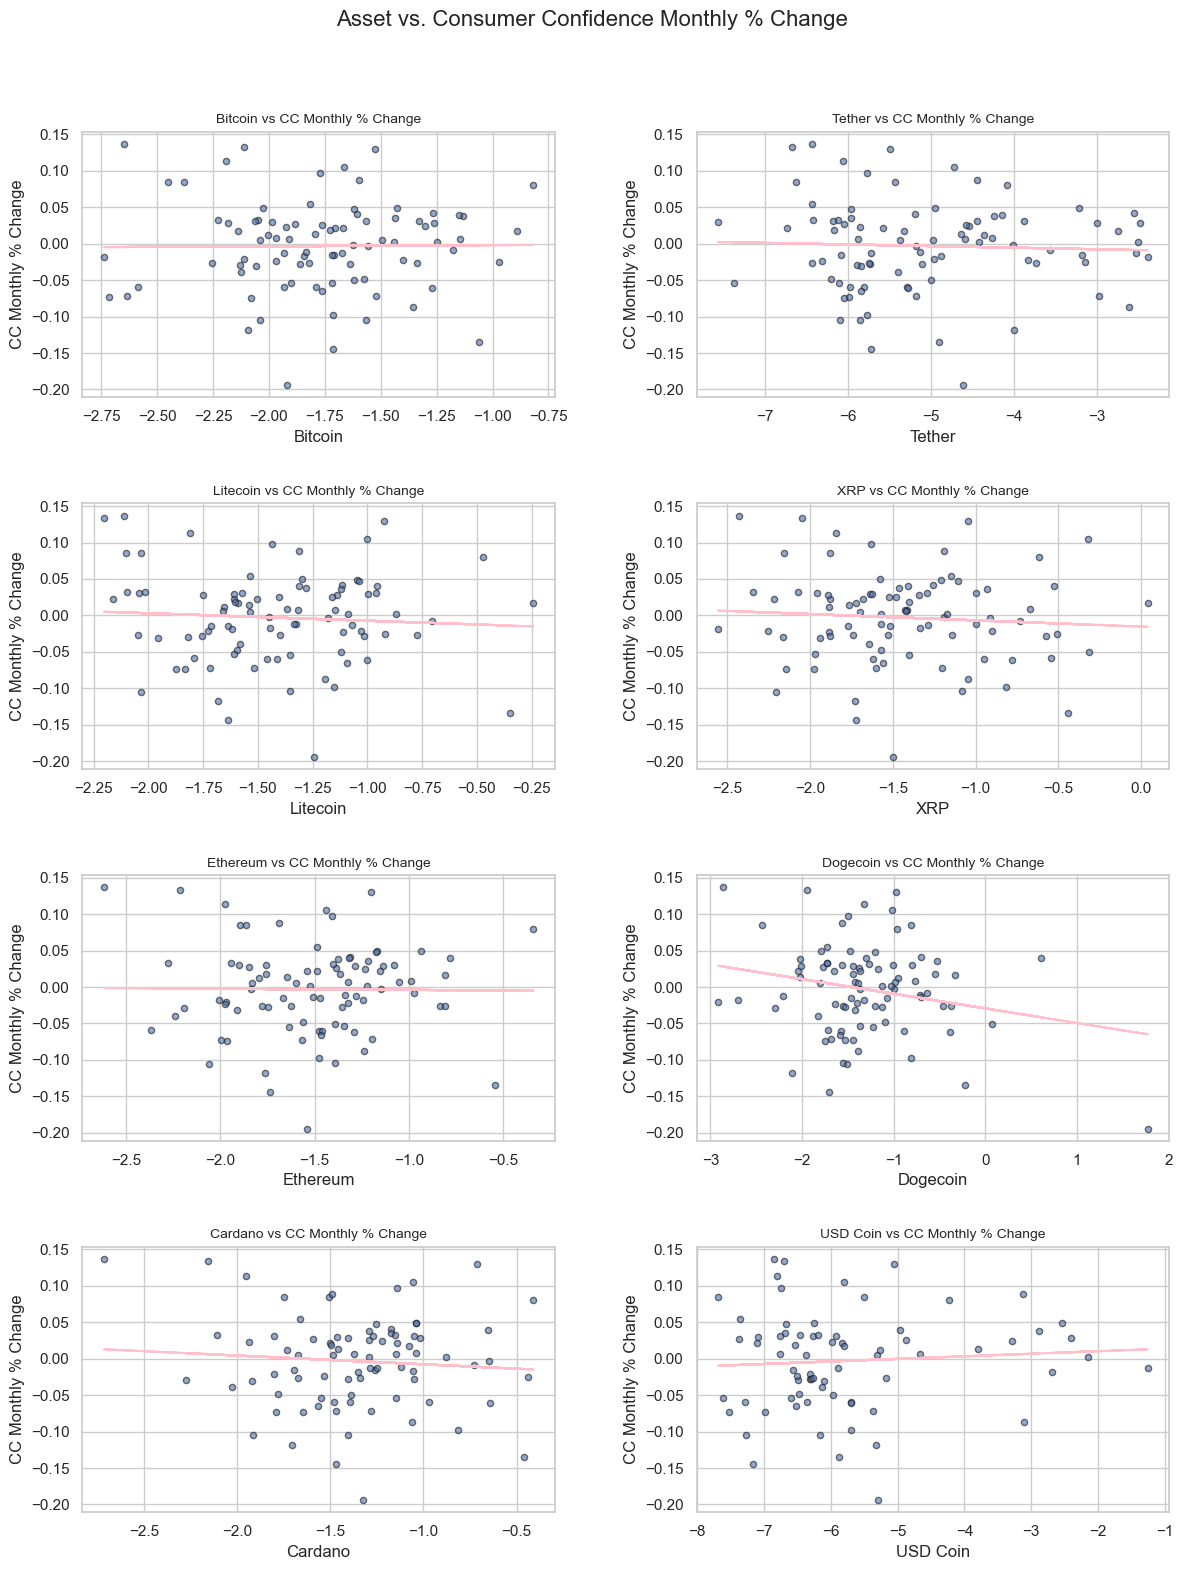

===== Bitcoin Regression Summary =====
                             OLS Regression Results                            
Dep. Variable:     CC Monthly % Change   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.012
Method:                  Least Squares   F-statistic:                  0.009068
Date:                 Wed, 11 Jun 2025   Prob (F-statistic):              0.924
Time:                         15:21:26   Log-Likelihood:                 120.15
No. Observations:                   88   AIC:                            -236.3
Df Residuals:                       86   BIC:                            -231.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [308]:
asset_cols = ['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']
macro_cols = ['CC Monthly % Change']

sns.set(style="whitegrid")

total_plots = len(asset_cols) * len(macro_cols)
plots_per_row = 2
n_rows = (total_plots + plots_per_row - 1) // plots_per_row  # ceiling division

fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(6 * plots_per_row, 4 * n_rows))
fig.suptitle("Asset vs. Consumer Confidence Monthly % Change", fontsize=16)

axes = axes.flatten() if total_plots > 1 else [axes]
model_results = []

plot_idx = 0
for asset in asset_cols:
    for macro in macro_cols:
        if plot_idx >= total_plots:
            break
        ax = axes[plot_idx]

        df['Lagged_LogVol'] = df[asset].shift(1)
        # Drop first row due to NaN from lag
        temp_df = df.dropna(subset=['Lagged_LogVol', macro])

        X = temp_df['Lagged_LogVol']
        y = temp_df[macro]

        X = sm.add_constant(X)  # Adds intercept

        # Scatter plot
        ax.scatter(temp_df['Lagged_LogVol'], y, alpha=0.6, edgecolor='k', s=20, label='Data Points')

        # Fit OLS model
        model = sm.OLS(y, X).fit()
        model_results.append((asset.strip(), model))

        # Plot regression line
        ax.plot(temp_df['Lagged_LogVol'], model.predict(X), color='pink', label='Regression Line')

        ax.set_xlabel(asset.strip())
        ax.set_ylabel(macro)
        ax.set_title(f"{asset.strip()} vs {macro}", fontsize=10)

        plot_idx += 1
        

# Hide unused subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

for asset_name, model in model_results:
    print(f"===== {asset_name} Regression Summary =====")
    print(model.summary())
    print("\n")

## GDP

### Including 2020.4, 2020.5, 2020.6
Tether (0.452), Ethereum (0.299)

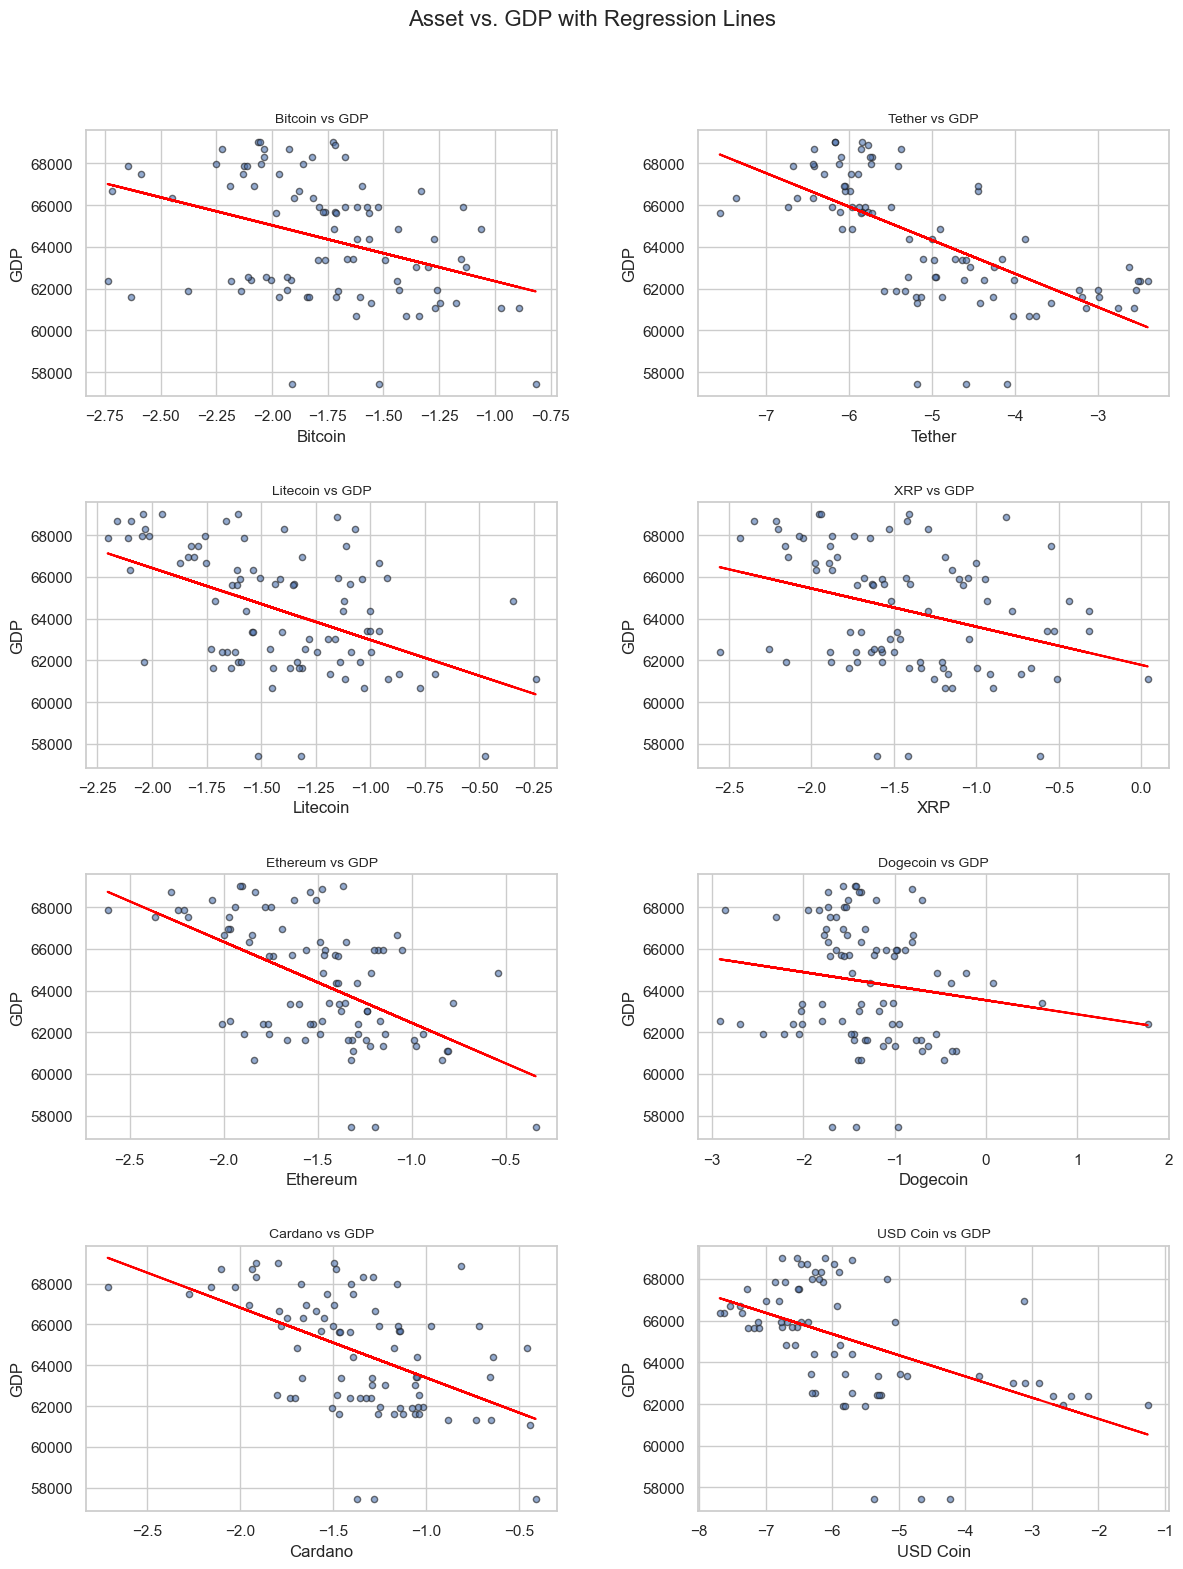

===== Bitcoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     14.10
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           0.000314
Time:                        15:01:31   Log-Likelihood:                -819.52
No. Observations:                  88   AIC:                             1643.
Df Residuals:                      86   BIC:                             1648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const  

In [299]:
asset_cols = ['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']
macro_cols = ['GDP']

sns.set(style="whitegrid")

total_plots = len(asset_cols) * len(macro_cols)
plots_per_row = 2
n_rows = (total_plots + plots_per_row - 1) // plots_per_row  # ceiling division

fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(6 * plots_per_row, 4 * n_rows))
fig.suptitle("Asset vs. GDP with Regression Lines", fontsize=16)

axes = axes.flatten() if total_plots > 1 else [axes]
model_results = []

plot_idx = 0
for asset in asset_cols:
    for macro in macro_cols:
        if plot_idx >= total_plots:
            break
        ax = axes[plot_idx]
        
        # Drop rows with NaNs in either variable

        df['Lagged_LogVol'] = df[asset].shift(1)

        temp_df = df.dropna(subset=['Lagged_LogVol', macro])

        X = temp_df['Lagged_LogVol']
        y = temp_df[macro]

        X = sm.add_constant(X)  # Adds intercept

        # Scatter plot
        ax.scatter(temp_df['Lagged_LogVol'], y, alpha=0.6, edgecolor='k', s=20, label='Data Points')

        # Fit OLS model
        model = sm.OLS(y, X).fit()
        model_results.append((asset.strip(), model))

        # Plot regression line
        ax.plot(temp_df['Lagged_LogVol'], model.predict(X), color='red', label='Regression Line')

        ax.set_xlabel(asset.strip())
        ax.set_ylabel(macro)
        ax.set_title(f"{asset.strip()} vs {macro}", fontsize=10)

        plot_idx += 1
        

# Hide unused subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

for asset_name, model in model_results:
    print(f"===== {asset_name} Regression Summary =====")
    print(model.summary())
    print("\n")

### Excluding 2020.4, 2020.5, 2020.6
Tether (0.538), Ethereum (0.265)

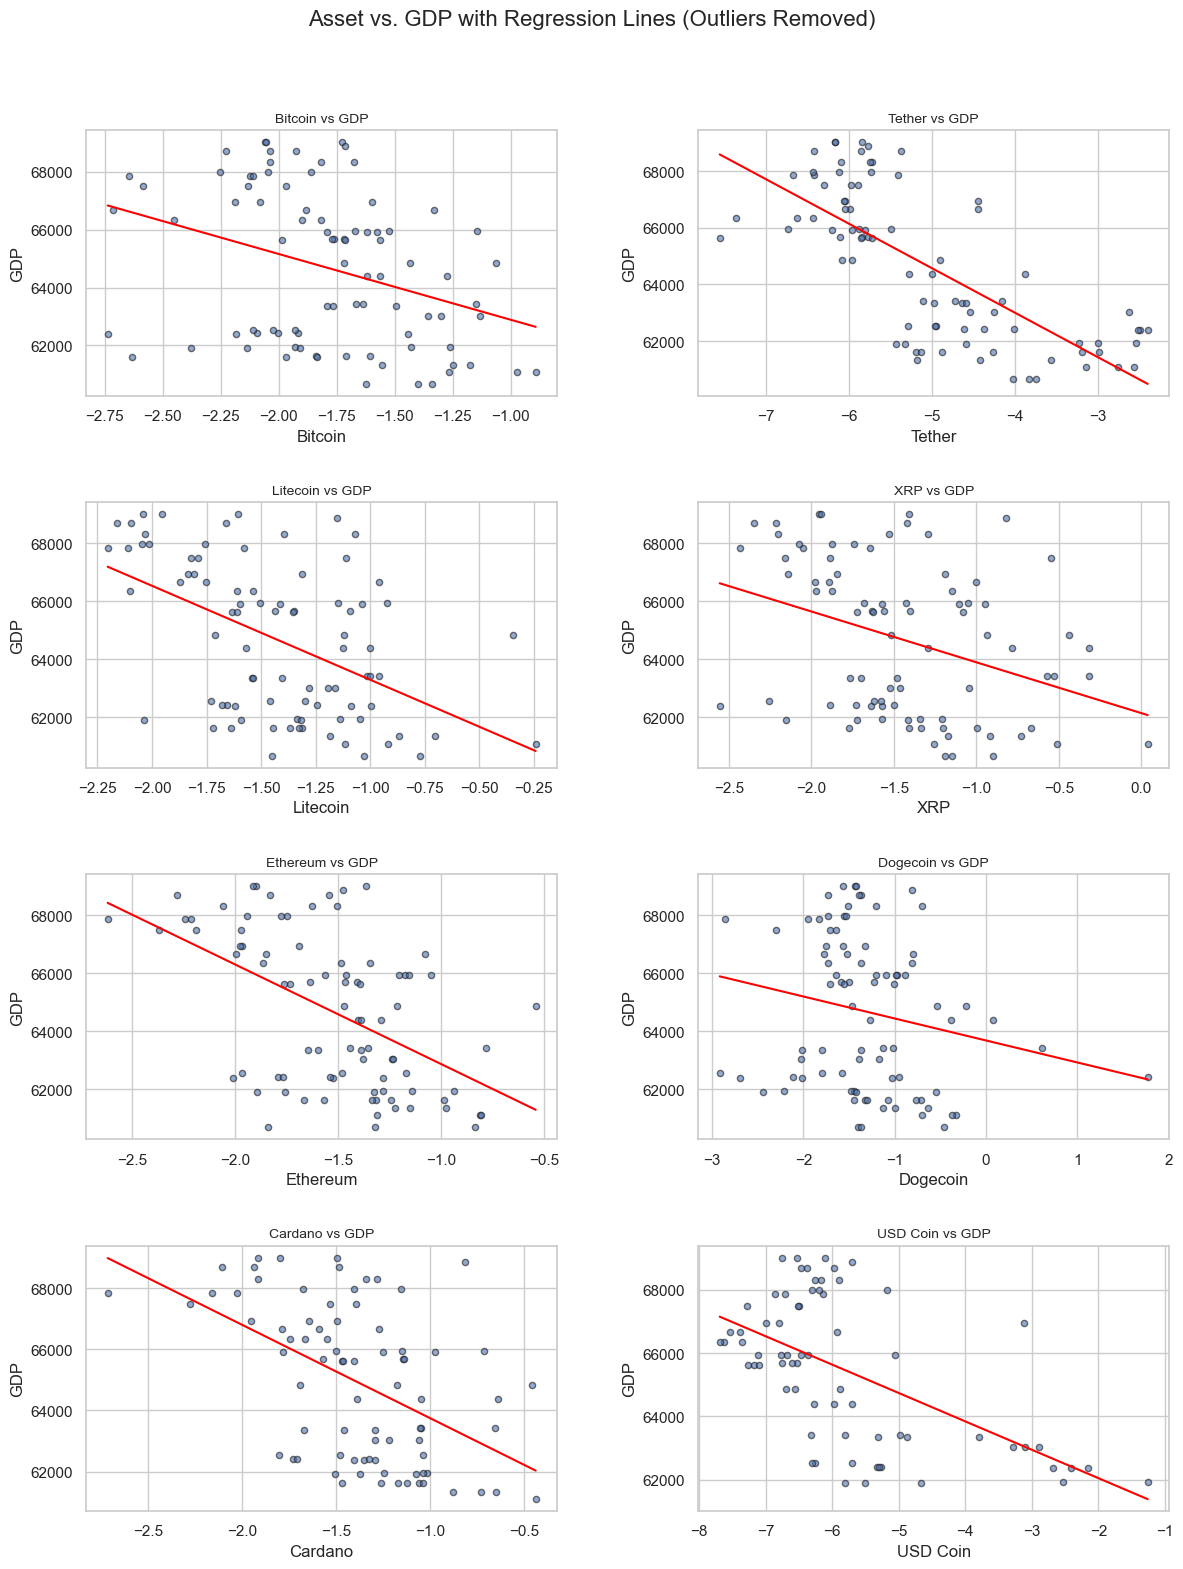

===== Bitcoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     11.18
Date:                Wed, 11 Jun 2025   Prob (F-statistic):            0.00125
Time:                        15:01:55   Log-Likelihood:                -784.38
No. Observations:                  85   AIC:                             1573.
Df Residuals:                      83   BIC:                             1578.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const  

In [300]:
asset_cols = ['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']
macro_cols = ['GDP']

sns.set(style="whitegrid")

total_plots = len(asset_cols) * len(macro_cols)
plots_per_row = 2
n_rows = (total_plots + plots_per_row - 1) // plots_per_row  # ceiling division

fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(6 * plots_per_row, 4 * n_rows))
fig.suptitle("Asset vs. GDP with Regression Lines (Outliers Removed)", fontsize=16)

axes = axes.flatten() if total_plots > 1 else [axes]
model_results = []

gdp_threshold = 58000  # "Outlier" cutoff

plot_idx = 0
for asset in asset_cols:
    for macro in macro_cols:
        if plot_idx >= total_plots:
            break

        ax = axes[plot_idx]

        # Filter and copy the relevant data
        temp_df = df[[asset, macro]].copy()
        temp_df = temp_df[temp_df[macro] >= gdp_threshold]

        # Create lagged version of asset
        temp_df['Lagged_LogVol'] = temp_df[asset].shift(1)

        # Drop rows with NaNs after lag
        temp_df = temp_df.dropna(subset=['Lagged_LogVol', macro])

        # Define regression variables
        X = temp_df['Lagged_LogVol']
        y = temp_df[macro]

        # Scatter plot of cleaned & aligned data
        ax.scatter(X, y, alpha=0.6, edgecolor='k', s=20, label='Data Points')

        # Step 6: Fit linear regression model
        X_const = sm.add_constant(X)
        model = sm.OLS(y, X_const).fit()
        model_results.append((asset.strip(), model))

        # Step 7: Plot regression line
        x_vals = np.linspace(X.min(), X.max(), 100)
        X_pred = sm.add_constant(x_vals)
        y_pred = model.predict(X_pred)
        ax.plot(x_vals, y_pred, color='red', label='Regression Line')

        # Step 8: Final plot styling
        ax.set_xlabel(asset.strip())
        ax.set_ylabel(macro)
        ax.set_title(f"{asset.strip()} vs {macro}", fontsize=10)

        plot_idx += 1

# Hide unused subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

# Print model summaries
for asset_name, model in model_results:
    print(f"===== {asset_name} Regression Summary =====")
    print(model.summary())
    print("\n")

## Fed Funds Rate

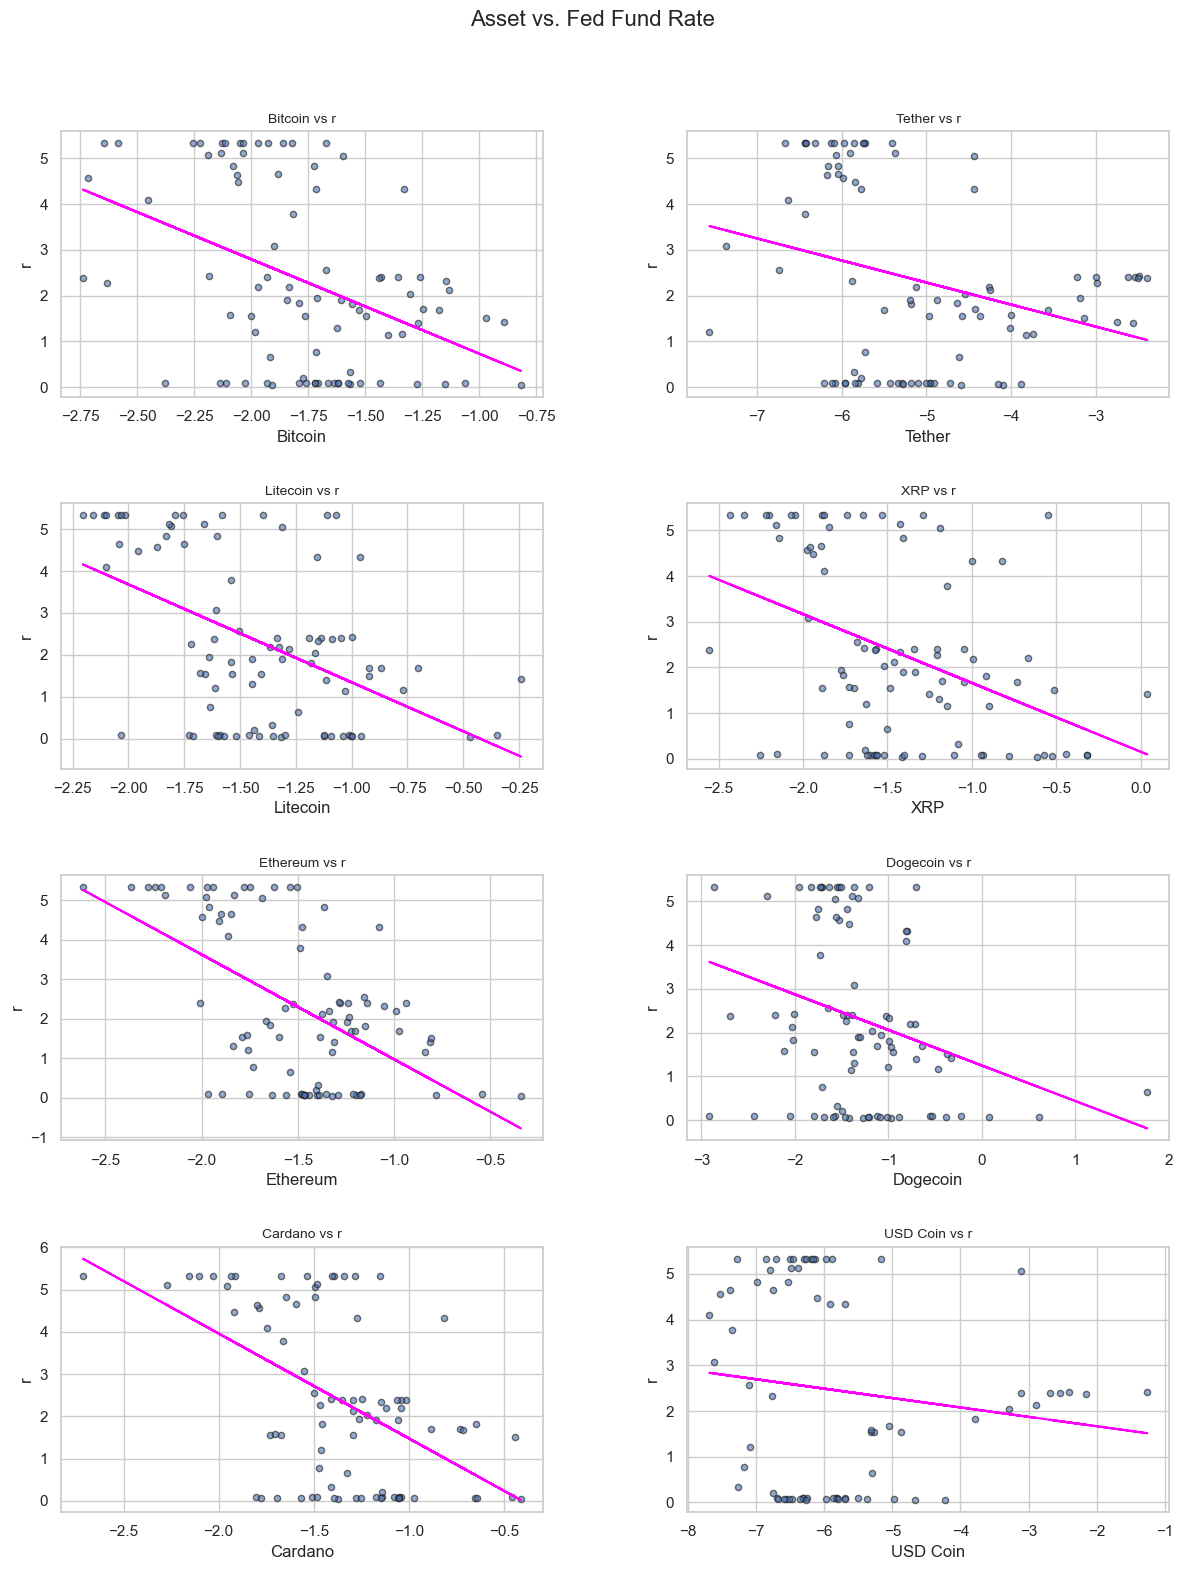

===== Bitcoin Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:                      r   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     19.24
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           3.25e-05
Time:                        15:22:10   Log-Likelihood:                -175.03
No. Observations:                  88   AIC:                             354.1
Df Residuals:                      86   BIC:                             359.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const  

In [309]:
asset_cols = ['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']
macro_cols = ['r']

sns.set(style="whitegrid")

total_plots = len(asset_cols) * len(macro_cols)
plots_per_row = 2
n_rows = (total_plots + plots_per_row - 1) // plots_per_row  # ceiling division

fig, axes = plt.subplots(n_rows, plots_per_row, figsize=(6 * plots_per_row, 4 * n_rows))
fig.suptitle("Asset vs. Fed Fund Rate", fontsize=16)

axes = axes.flatten() if total_plots > 1 else [axes]
model_results = []

plot_idx = 0
for asset in asset_cols:
    for macro in macro_cols:
        if plot_idx >= total_plots:
            break
        ax = axes[plot_idx]

        df['Lagged_LogVol'] = df[asset].shift(1)
        # Drop first row due to NaN from lag
        temp_df = df.dropna(subset=['Lagged_LogVol', macro])

        X = temp_df['Lagged_LogVol']
        y = temp_df[macro]

        X = sm.add_constant(X)  # Adds intercept

        # Scatter plot
        ax.scatter(temp_df['Lagged_LogVol'], y, alpha=0.6, edgecolor='k', s=20, label='Data Points')

        # Fit OLS model
        model = sm.OLS(y, X).fit()
        model_results.append((asset.strip(), model))

        # Plot regression line
        ax.plot(temp_df['Lagged_LogVol'], model.predict(X), color='Magenta', label='Regression Line')

        ax.set_xlabel(asset.strip())
        ax.set_ylabel(macro)
        ax.set_title(f"{asset.strip()} vs {macro}", fontsize=10)

        plot_idx += 1
        

# Hide unused subplots
for i in range(plot_idx, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

for asset_name, model in model_results:
    print(f"===== {asset_name} Regression Summary =====")
    print(model.summary())
    print("\n")

# Adjusted Time Frame (2020-2025)

## All Assets

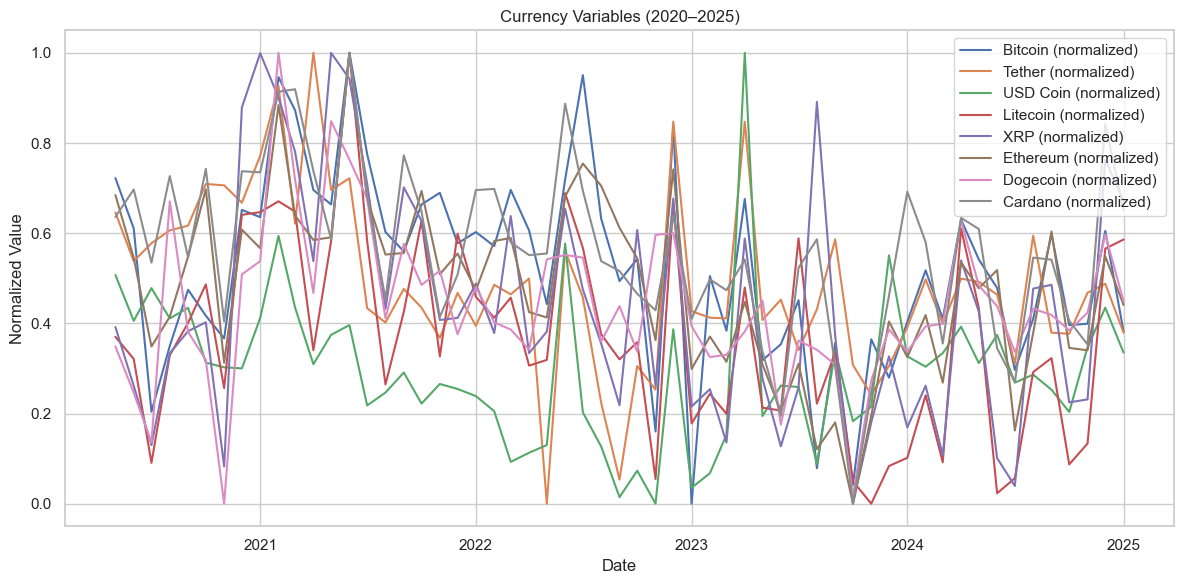

In [297]:
df_new = df[32:]

# Plot all four columns on the same graph
plt.figure(figsize=(12, 6))

# Normalize each series for comparison (optional but recommended)
df_normalized = df_new[['Bitcoin', 'Tether', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano ', 'USD Coin']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Plot
plt.plot(df_normalized.index, df_normalized['Bitcoin'], label='Bitcoin (normalized)')
plt.plot(df_normalized.index, df_normalized['Tether'], label='Tether (normalized)')
plt.plot(df_normalized.index, df_normalized['USD Coin'], label='USD Coin (normalized)')
plt.plot(df_normalized.index, df_normalized['Litecoin'], label='Litecoin (normalized)')
plt.plot(df_normalized.index, df_normalized['XRP'], label='XRP (normalized)')
plt.plot(df_normalized.index, df_normalized['Ethereum'], label='Ethereum (normalized)')
plt.plot(df_normalized.index, df_normalized['Dogecoin'], label='Dogecoin (normalized)')
plt.plot(df_normalized.index, df_normalized['Cardano '], label='Cardano (normalized)')

plt.title('Currency Variables (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## All Macros

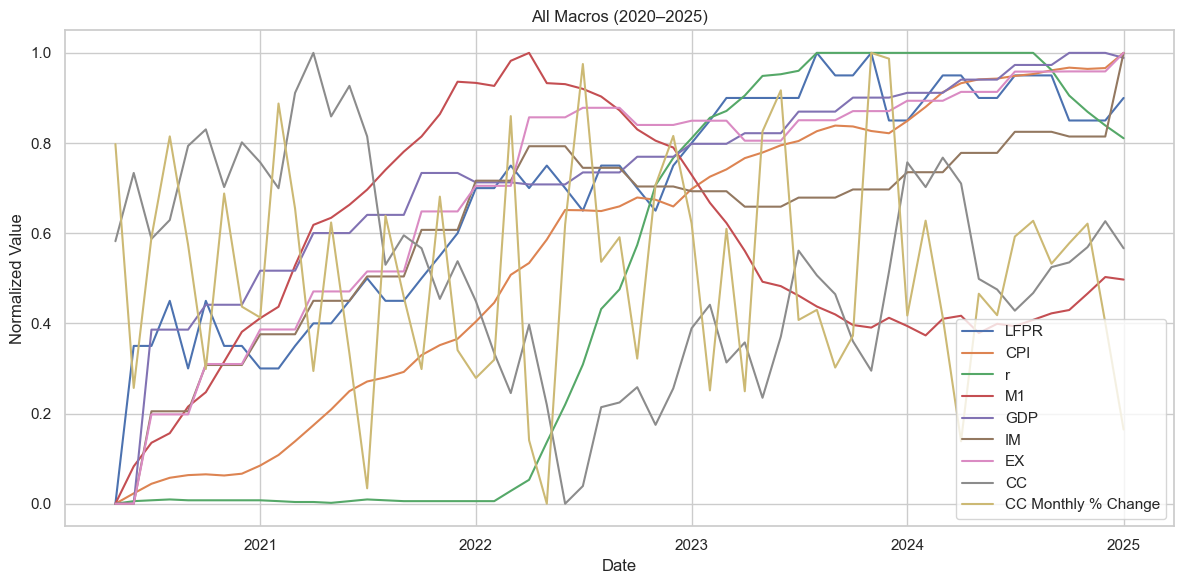

In [298]:
# Plot all four columns on the same graph

plt.figure(figsize=(12, 6))

# Normalize each series for comparison (optional but recommended)
df_normalized = df_new[['LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC', 'CC Monthly % Change']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Plot
plt.plot(df_normalized.index, df_normalized['LFPR'], label='LFPR')
plt.plot(df_normalized.index, df_normalized['CPI'], label='CPI')
plt.plot(df_normalized.index, df_normalized['r'], label='r')
plt.plot(df_normalized.index, df_normalized['M1'], label='M1')
plt.plot(df_normalized.index, df_normalized['GDP'], label='GDP')
plt.plot(df_normalized.index, df_normalized['IM'], label='IM')
plt.plot(df_normalized.index, df_normalized['EX'], label='EX')
plt.plot(df_normalized.index, df_normalized['CC'], label='CC')
plt.plot(df_normalized.index, df_normalized['CC Monthly % Change'], label='CC Monthly % Change')

plt.title('All Macros (2020–2025)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()